# MOT strength
30 repeats at MOT voltage (V) = 2.5, 3.33, 4.16, 4.99. Image starts at 41

In [1]:
import os
import datarun
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [2]:
d = datarun.Experiment(
    vstart = 2.5,
    vend = 4.99,
    vstep = 0.83, 
    idx_start = 41,
    datapath = os.path.join(os.getcwd(),'mar28'),
    numtrials = 30,
    mask=0.25
)

on 0: /Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:164: RuntimeWarning: divide by zero encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))
/Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:164: RuntimeWarning: invalid value encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))


|████████████████████████████████████████| 120/120 [100%] in 2:50.3 (0.70/s)                                            


In [ ]:
data = d.structure_data()
keys=list(data.keys())
# for datum in data[keys[0]]:
#     datum.plot_fit()

2.5 1.0530384526777008
2.5 1.0524051852730445
3.33 1.2901782075736905
4.16 1.0340374773470833
4.99 1.0102813924498883
4.99 1.0100986655259974
4.99 1.2566149602785142


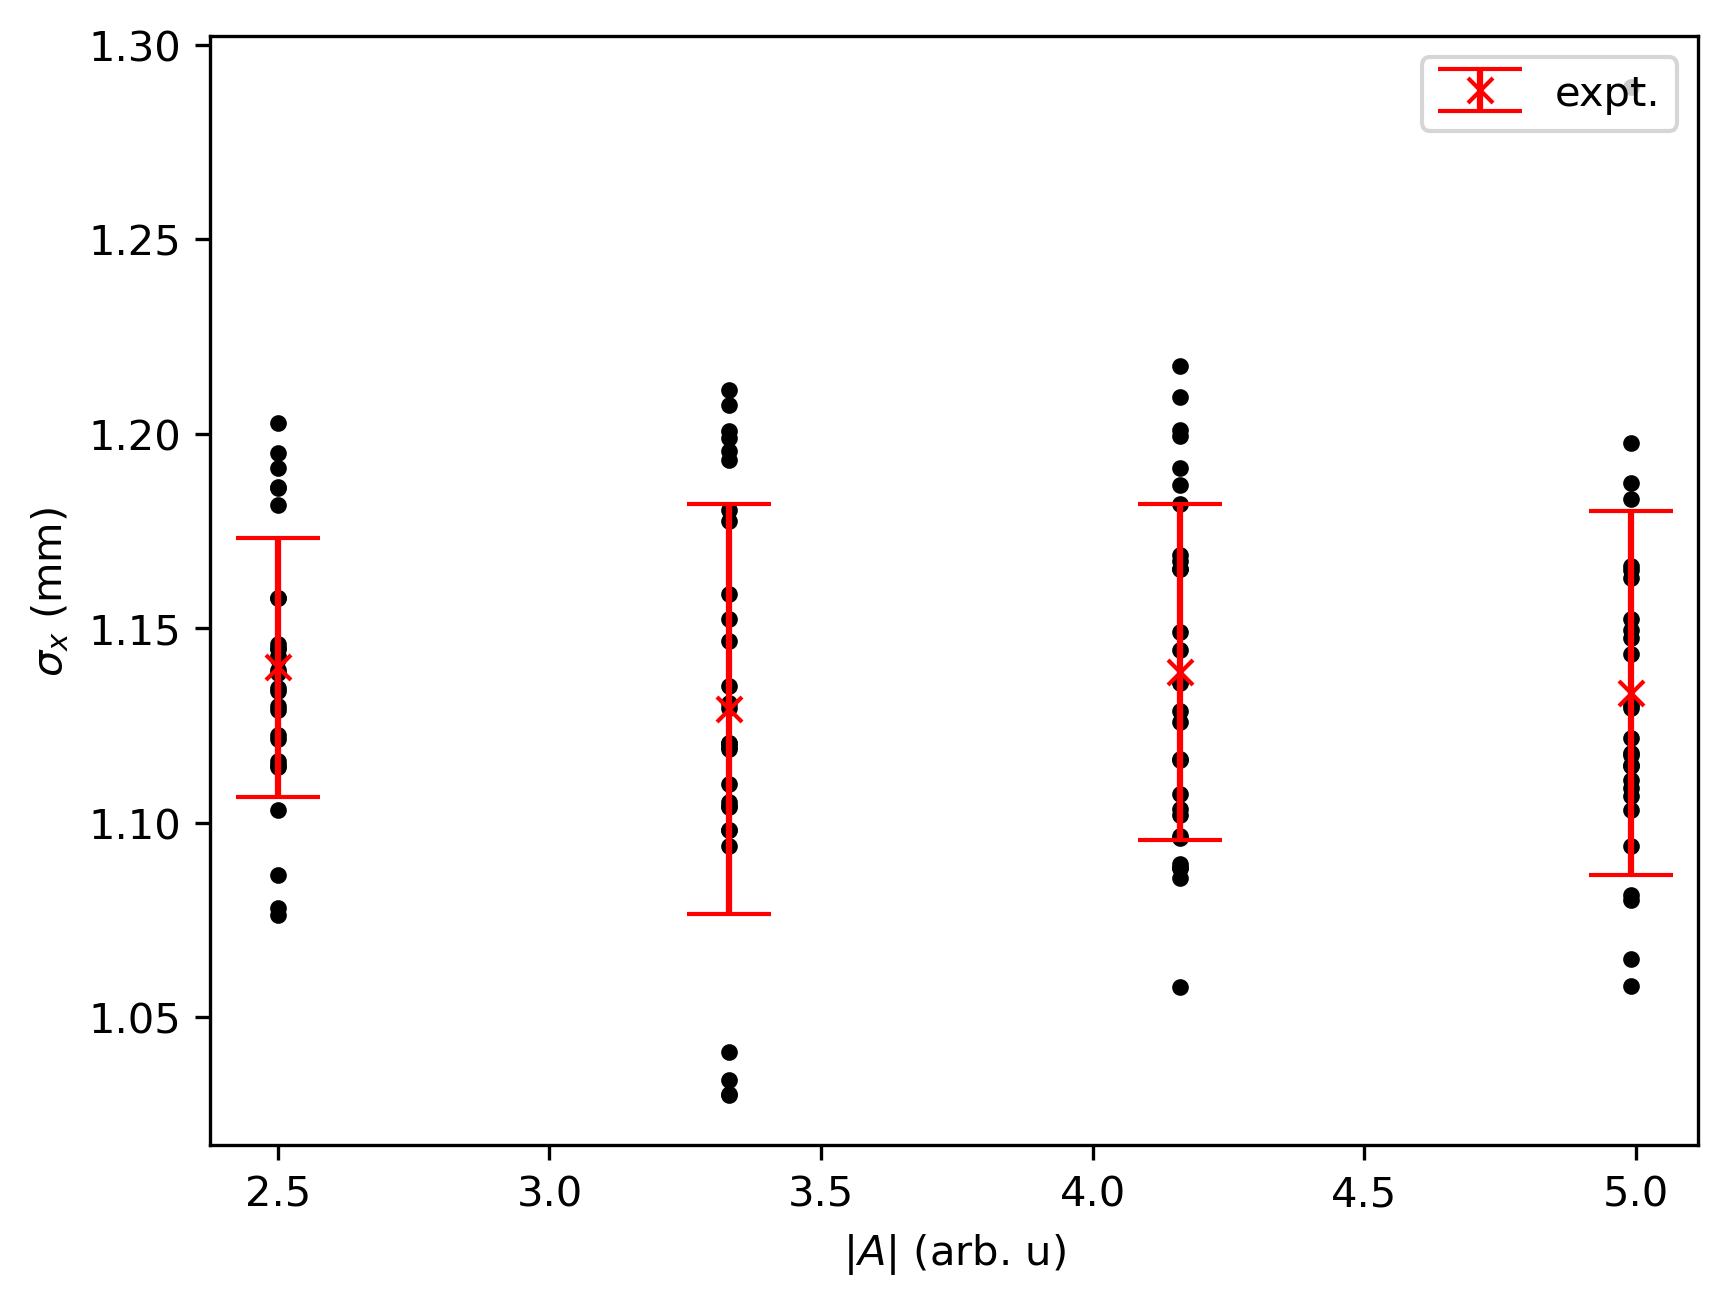

In [8]:
scaling=1000
sigma_times = d.structure_data(lambda d : d.popt_x[2]*scaling)
removed_count = 0
for key in sigma_times:
    sigma = np.std(sigma_times[key])
    mean = np.mean(sigma_times[key])
    for val in sigma_times[key]:
        if np.abs(val-mean) > 2*sigma:
            sigma_times[key].remove(val)
            print(key, val)

means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]
time_list = np.array(list(sigma_times.keys()))

plt.errorbar(np.array(list((sigma_times.keys()))), np.array(means), yerr = np.array(errs), linestyle = "None", c = 'r', capsize=10, marker = "x", label = "expt.")
for time, arr in sigma_times.items():
    for val in arr:
        plt.scatter(time, val, c="k", marker = ".")

xaxis = np.linspace(min(d.vlist), max(d.vlist), 100)
# plt.plot(xaxis, (popt[0]*xaxis**0.5), c="b", label = r"$\langle v_x^2\rangle t^2+\sigma_x^2(0)$")

plt.xlabel(r"$|A|$ (arb. u)")
plt.ylabel(r"$\sigma_x$ (mm)")
plt.gcf().set_dpi(300)
plt.legend(loc='upper right')

## Number dependence on Field Gradient

In [ ]:
# sigma_times = d.structure_data(lambda d : d.popt_y[2]**2)
sigma_times = d.structure_data(lambda d : d.atom_number())
removed_count = 0
for key in sigma_times:
    sigma = np.std(sigma_times[key]) 
    mean = np.mean(sigma_times[key])
    for val in sigma_times[key]:
        if np.abs(val-mean) > 2*sigma:
            sigma_times[key].remove(val)
            print(key, val)

means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]
time_list = np.array(list(sigma_times.keys()))
popt, pcov = curve_fit(lambda x,a:a*np.sqrt(x), d.vlist, means, sigma=errs)
print(popt)
verr=np.sqrt(pcov[0][0])
verr

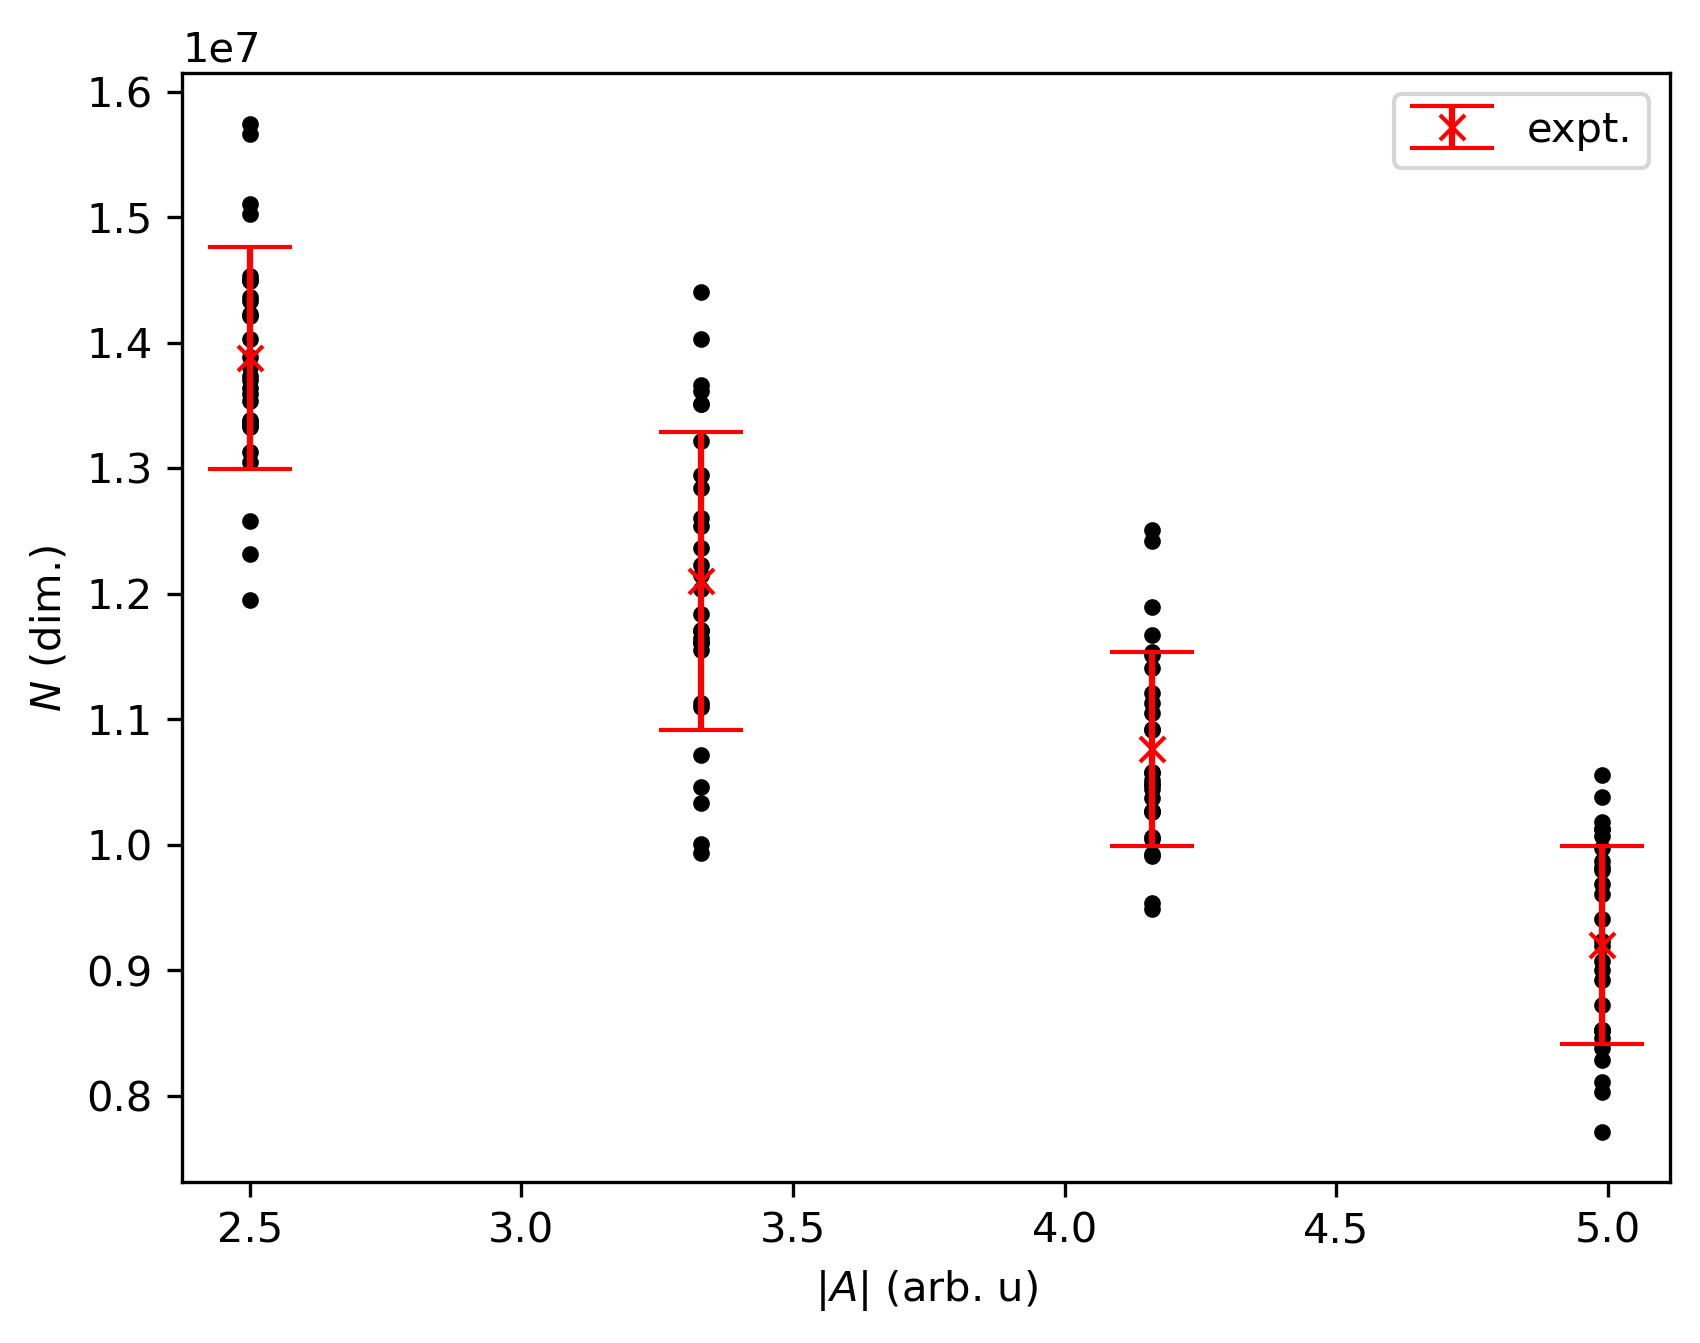

In [24]:
plt.errorbar(np.array(list((sigma_times.keys()))), np.array(means), yerr = np.array(errs), linestyle = "None", c = 'r', capsize=10, marker = "x", label = "expt.")
for time, arr in sigma_times.items():
    for val in arr:
        plt.scatter(time, val, c="k", marker = ".")

# xaxis = np.linspace(min(d.vlist), max(d.vlist), 100)
# plt.plot(xaxis**2, (popt[0]*xaxis**2+popt[1]), c="b", label = r"$\langle v_x^2\rangle t^2+\sigma_x^2(0)$")

plt.xlabel(r"$|A|$ (arb. u)")
plt.ylabel(r"$N$ (dim.)")
plt.gcf().set_dpi(300)
plt.legend(loc='upper right')

## Expected size of blob (output in m)

In [11]:
#rms radius of 7 coils. Scaled from mm to m
a=np.sqrt(np.mean(np.square(np.arange(45.1,70.2,(70.2-50.1)/6))))*1e-3
n=35
I=5.39
#approximate d. should measure this directly
d=1.25*a
#calculate field gradient in T/m. Multiply by 100 to get G/cm (conventional units)
u0=4*np.pi*1e-7
def calc_A(a,n,I,d,u0):
    return 48*a**2*d*u0*I*n/(4*a**2+d**2)**2.5
lambd=766.7*1e-9
k=2*np.pi/lambd
hbar=1.054571817*1e-34
gamma=1/(26.375*1e-9)
I_sat=2*(np.pi)**2*hbar*299792458*gamma/(3*lambd**3)
I=26e-3/(np.pi*(4.5e-3)**2)
dipole=9.2740100783e-24*(4/3*3/2-2.00229421*0.5)
#need to check what the actual intensity used was
s0=I/I_sat
delta_0=16.2e6
# #factor of 2 accounts for double passing, second factor of 2 is the voltage
# delta_0=2*2*71.66*2*1e6
def calc_kappa():
    A=calc_A(a,n,I,d,u0)
    return 8*hbar*k**2*s0*delta_0/(gamma*(1+s0+4*delta_0**2/gamma**2)**2)*(dipole*A/(hbar*k))
kappa=calc_kappa()
boltz=1.380649e-23
temp=5e-3
x_rms=np.sqrt(boltz*temp/kappa)
x_rms

3.9932507405826736e-05